In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from torch import nn
from torchsummary import summary

# Tensors

In [2]:
lista = [[1,5,8],
         [7,3,2]]

---

In [3]:
tns = torch.Tensor(lista)
print(tns)
print(tns.dtype)

tensor([[1., 5., 8.],
        [7., 3., 2.]])
torch.float32


In [4]:
tns = torch.DoubleTensor(lista)
print(tns)
print(tns.dtype)

tensor([[1., 5., 8.],
        [7., 3., 2.]], dtype=torch.float64)
torch.float64


In [5]:
tns = torch.LongTensor(lista)
print(tns)
print(tns.dtype)

tensor([[1, 5, 8],
        [7, 3, 2]])
torch.int64


---

In [6]:
arr = np.random.rand(3,4)
tns = torch.from_numpy(arr)

print(arr.dtype)
print(tns.dtype)

float64
torch.float64


In [7]:
arr = np.random.rand(3,4).astype(int)
tns = torch.from_numpy(arr)

print(arr.dtype)
print(tns.dtype)

int64
torch.int64


---

In [8]:
tns0 = torch.zeros(3,2)
tns1 = torch.ones(4,3)
tnsr = torch.randn(2,5)

print(tns0)
print(tns1)
print(tnsr)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-0.2069,  1.3954, -0.2852, -1.9657,  1.3076],
        [-0.5261, -0.1460, -1.0717, -0.7712, -0.3582]])


In [9]:
arr_tns = tnsr.data.numpy()
print(type(tnsr))
print(type(arr_tns))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


---

In [10]:
print(tnsr)
tnsr[0, 2] = -5
print(tnsr)

tensor([[-0.2069,  1.3954, -0.2852, -1.9657,  1.3076],
        [-0.5261, -0.1460, -1.0717, -0.7712, -0.3582]])
tensor([[-0.2069,  1.3954, -5.0000, -1.9657,  1.3076],
        [-0.5261, -0.1460, -1.0717, -0.7712, -0.3582]])


In [11]:
print(tnsr[0:2])
print(tnsr[0:2,0])
print(tnsr[1,2:4])
print(tnsr[0,1])

tensor([[-0.2069,  1.3954, -5.0000, -1.9657,  1.3076],
        [-0.5261, -0.1460, -1.0717, -0.7712, -0.3582]])
tensor([-0.2069, -0.5261])
tensor([-1.0717, -0.7712])
tensor(1.3954)


In [12]:
tns0.shape

torch.Size([3, 2])

---

In [13]:
tnsr_aux = torch.randn(2,5)

print(torch.mm(tnsr, tnsr_aux.T))

tensor([[ 5.4835, -5.5063],
        [-0.3745, -0.0706]])


In [14]:
tns0.size()

torch.Size([3, 2])

---

In [15]:
tnsr_3d = torch.randn(2,2,3)
print(tnsr_3d)

tensor([[[ 2.3496,  1.1269, -0.0574],
         [ 0.1830, -0.5028, -1.0836]],

        [[-0.3966,  0.7379, -0.8171],
         [-0.3690,  0.4120,  1.3432]]])


In [16]:
tnsr_3d_flat = tnsr_3d.view(12)
tnsr_3d_flat
# ===
tnsr_3d_flat = tnsr_3d.view(-1)
tnsr_3d_flat

tensor([ 2.3496,  1.1269, -0.0574,  0.1830, -0.5028, -1.0836, -0.3966,  0.7379,
        -0.8171, -0.3690,  0.4120,  1.3432])

In [17]:
tnsr_3d_flat = tnsr_3d.view(4,3)
tnsr_3d_flat

tensor([[ 2.3496,  1.1269, -0.0574],
        [ 0.1830, -0.5028, -1.0836],
        [-0.3966,  0.7379, -0.8171],
        [-0.3690,  0.4120,  1.3432]])

In [18]:
tnsr_3d_flat = tnsr_3d.view(tns.size(0), -1)
tnsr_3d_flat

tensor([[ 2.3496,  1.1269, -0.0574,  0.1830],
        [-0.5028, -1.0836, -0.3966,  0.7379],
        [-0.8171, -0.3690,  0.4120,  1.3432]])

---

In [19]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


In [20]:
tnsr = tns.to(device)
print(tnsr)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], device='cuda:0')


---

In [21]:
tns1_challenge = torch.randn(7,7,3)
tns2_challenge = torch.randn(147,1)

In [22]:
tns1_challenge

tensor([[[ 0.7835,  0.4895,  0.6511],
         [ 1.2539,  0.1750,  0.4811],
         [ 0.0913,  0.2934,  0.0989],
         [ 0.9402, -1.6293, -0.3499],
         [-0.8512, -0.3708,  0.2512],
         [-0.1964, -0.9620, -0.9214],
         [-0.8588,  0.6657, -0.9003]],

        [[-0.5314,  0.9121, -1.5914],
         [ 0.9180,  0.7423, -0.8514],
         [-0.2728,  0.6187, -1.6251],
         [ 2.6753,  0.4723, -0.5135],
         [ 1.0578, -0.5539,  0.7556],
         [ 1.7943,  0.5257,  0.9326],
         [ 1.4592, -0.0741,  0.7310]],

        [[ 1.1994, -1.4007, -0.8737],
         [-1.0741,  0.4485, -0.6245],
         [-0.3685,  0.4004, -0.2081],
         [-1.2565,  0.5666,  0.3659],
         [-0.7087, -1.0481,  1.4616],
         [-0.9046, -0.2365, -0.6375],
         [ 0.7958,  0.3486, -0.7477]],

        [[-0.2165, -0.5178, -0.3685],
         [-1.3107,  1.3883, -1.1448],
         [-1.0551, -2.0194, -2.7144],
         [-0.7862,  1.0789,  0.5611],
         [-0.2391,  0.8998,  0.4446],
      

In [23]:
tns2_challenge.shape

torch.Size([147, 1])

In [24]:
tns1_challenge = tns1_challenge.view(147, -1)
tns1_challenge.shape

torch.Size([147, 1])

In [25]:
tnss_sum = tns1_challenge + tns2_challenge

# Perceptron

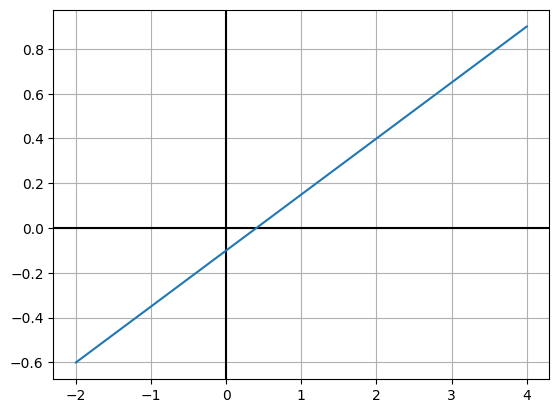

In [26]:
a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x - c)/b

def plotline(a, b, c):
    x = np.linspace(-2, 4, 50)
    y = (-a*x - c)/b

    plt.axvline(0, -1, 1, color='k')
    plt.axhline(0, -2, 5, color='k')
    plt.plot(x, y)
    plt.grid(True)
plotline(a, b, c)

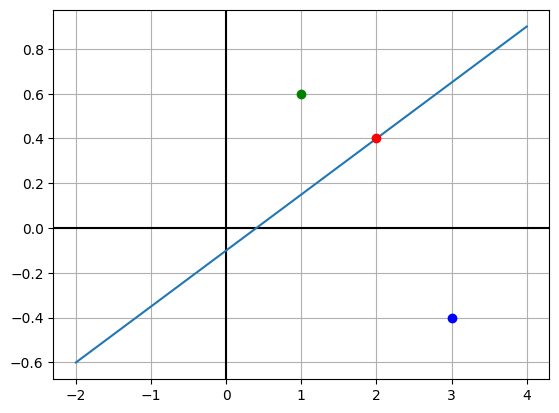

In [27]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a, b, c)
plt.plot(p1[0], p1[1], color='r', marker='o')
plt.plot(p2[0], p2[1], color='g', marker='o')
plt.plot(p3[0], p3[1], color='b', marker='o')

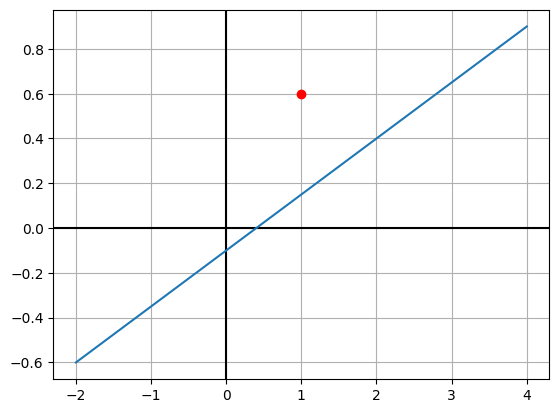

In [28]:

ret1 = a*p2[0] + b*p2[1] + c

plotline(a, b, c)
plt.plot(p2[0], p2[1], color='r', marker='o')

---

1


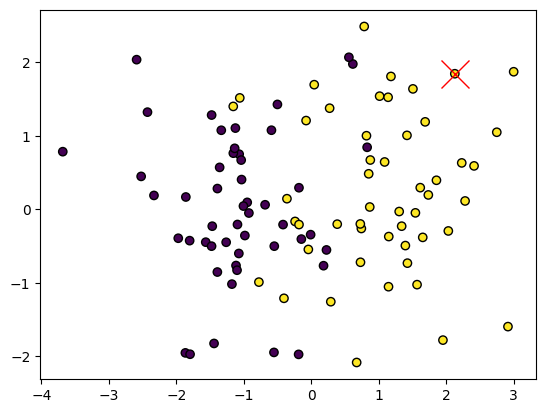

In [29]:
np.random.seed(46)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

p = X[20]
print(Y[20])
plt.plot(p[0], p[1], marker='x', markersize=20, color='r')

7


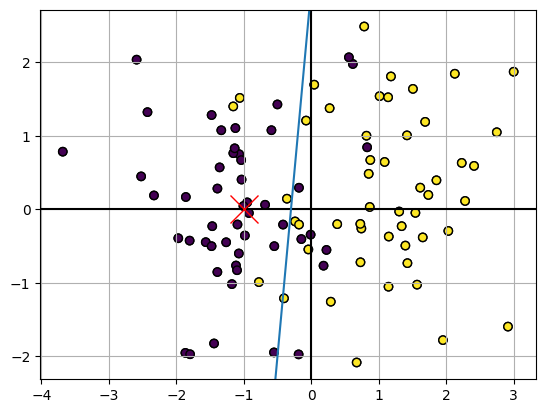

In [30]:
def plotline_model(w1, w2, b):

    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

    x = np.linspace(-2, 4, 50)
    y = (-w1*x - b)/w2

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    plt.axvline(0, -1, 1, color='k')
    plt.axhline(0, -2, 5, color='k')
    plt.plot(x, y)
    plt.grid(True)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

w1 = -10
w2 = 1
b  = -3
plotline_model(w1, w2, b)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

p = (-1, 0)
plt.plot(p[0], p[1], marker='x', markersize=20, color='r')
print(w1 * p[0] + w2 * p[1] + b)

1 yellow


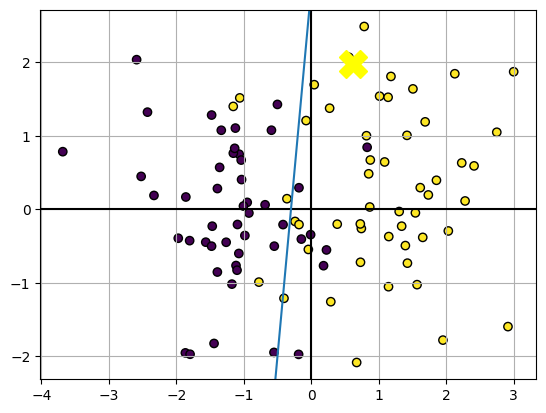

In [31]:
def classify(ponto, w1, w2, b):
    ret = w1 * ponto[0] + w2 * ponto[1] + b

    if ret <= 0:
        return 1, 'yellow'
    else:
        return 0, 'purple'

p = (0.61731066, 1.97848595)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotline_model(w1, w2, b)
plt.plot(p[0], p[1], marker='X', color=cor, markersize=20)

In [32]:
classify((0.61731066, 1.97848595), w1, w2, b)

(1, 'yellow')

In [33]:
X[2]

array([0.61731066, 1.97848595])

In [34]:
acertos = 0
for i in range(len(X)):
    categ, _ = classify(X[i], w1, w2, b)
    if categ == Y[i]:
        acertos += 1

print(acertos/len(X))

0.87


## Desafio

1


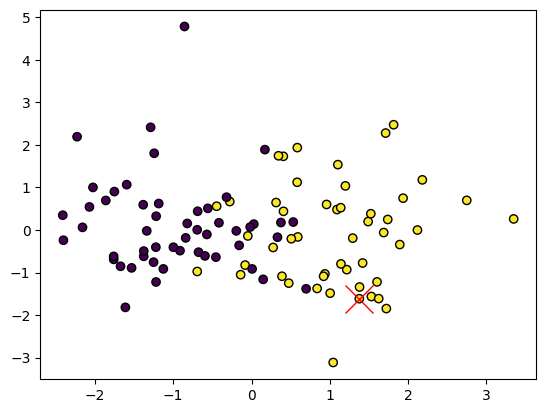

In [35]:
np.random.seed(55)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

p = X[20]
print(Y[20])
plt.plot(p[0], p[1], marker='x', markersize=20, color='r')

In [36]:
np.linspace(-2, 4)

array([-2.        , -1.87755102, -1.75510204, -1.63265306, -1.51020408,
       -1.3877551 , -1.26530612, -1.14285714, -1.02040816, -0.89795918,
       -0.7755102 , -0.65306122, -0.53061224, -0.40816327, -0.28571429,
       -0.16326531, -0.04081633,  0.08163265,  0.20408163,  0.32653061,
        0.44897959,  0.57142857,  0.69387755,  0.81632653,  0.93877551,
        1.06122449,  1.18367347,  1.30612245,  1.42857143,  1.55102041,
        1.67346939,  1.79591837,  1.91836735,  2.04081633,  2.16326531,
        2.28571429,  2.40816327,  2.53061224,  2.65306122,  2.7755102 ,
        2.89795918,  3.02040816,  3.14285714,  3.26530612,  3.3877551 ,
        3.51020408,  3.63265306,  3.75510204,  3.87755102,  4.        ])

9


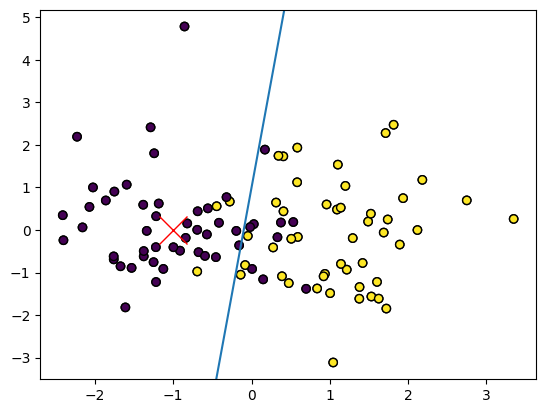

In [37]:
def plotline_model(w1, w2, b):

    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

    x = np.linspace(-2, 4)
    y = (-w1*x - b)/w2

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    plt.plot(x, y)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

w1 = -10
w2 = 1
b  = -1
plotline_model(w1, w2, b)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

p = (-1, 0)
plt.plot(p[0], p[1], marker='x', markersize=20, color='r')
print(w1 * p[0] + w2 * p[1] + b)

1 yellow


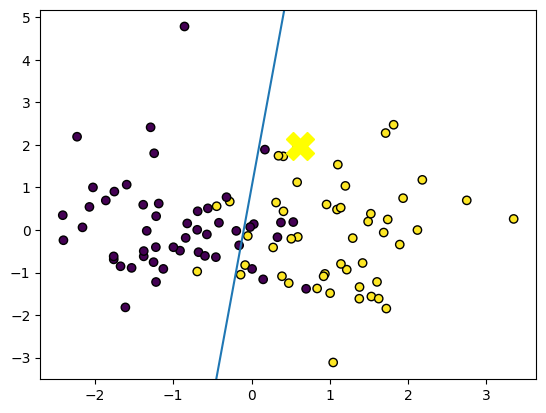

In [38]:
def classify(ponto, w1, w2, b):
    ret = w1 * ponto[0] + w2 * ponto[1] + b

    if ret <= 0:
        return 1, 'yellow'
    else:
        return 0, 'purple'

p = (0.61731066, 1.97848595)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotline_model(w1, w2, b)
plt.plot(p[0], p[1], marker='X', color=cor, markersize=20)

In [39]:
acertos = 0
for i in range(len(X)):
    categ, _ = classify(X[i], w1, w2, b)
    if categ == Y[i]:
        acertos += 1

print(acertos/len(X))

0.88


---

In [40]:
np.random.seed(101)
X, Y = make_classification(n_samples = 500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)

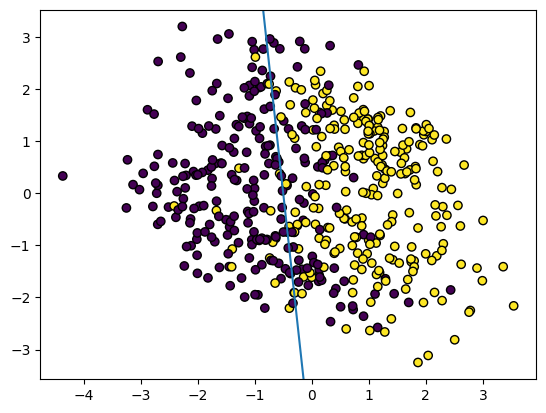

In [41]:
def plotar_grafico(w1, w2, b):
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k')

    x = np.linspace(-4, 3)
    y = ((-w1*x - b)/w2)

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    plt.plot(x, y)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

w1 = 10
w2 = 1
b  = 5
plotar_grafico(w1, w2, b)

In [42]:
w1 * -1 + w2 * -1 + b

-6

In [43]:
def classificar(ponto, w1, w2, b):
    resultado = w1 * ponto[0] + w2 * ponto[1] + b

    if resultado >= 0:
        return 1
    else:
        return 0

classificar((-1, -1), w1, w2, b)

0

In [44]:
acertos = 0
for i in range(len(X)):
    classe = classificar(X[i], w1, w2, b)
    if classe == Y[i]:
        acertos += 1

print(acertos / len(X))

0.826


## Camada Linear

In [45]:
perceptron = nn.Linear(3, 1)
perceptron

Linear(in_features=3, out_features=1, bias=True)

In [46]:
print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.4734,  0.3923,  0.3535]])
tensor([-0.4909])


In [47]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

In [48]:
X = torch.Tensor([0, -1, 2])
y = perceptron(X)

print(y)

tensor([-0.1761], grad_fn=<ViewBackward0>)


# Ativações

1
11.2


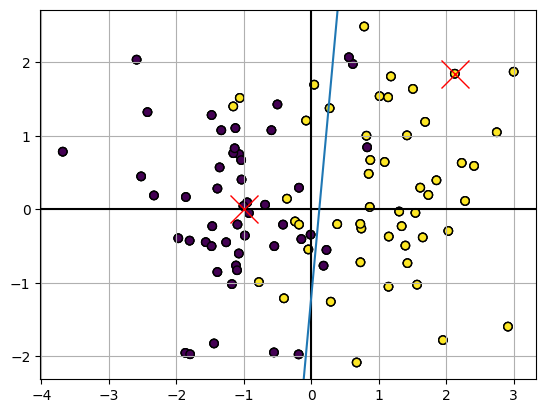

In [49]:
np.random.seed(46)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

p = X[20]
print(Y[20])
plt.plot(p[0], p[1], marker='x', markersize=20, color='r')

def plotline_model(w1, w2, b):

    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

    x = np.linspace(-2, 4, 50)
    y = (-w1*x - b)/w2

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    plt.axvline(0, -1, 1, color='k')
    plt.axhline(0, -2, 5, color='k')
    plt.plot(x, y)
    plt.grid(True)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

w1 = -10
w2 = 1
b  = 1.2
plotline_model(w1, w2, b)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

p = (-1, 0)
plt.plot(p[0], p[1], marker='x', markersize=20, color='r')
print(w1 * p[0] + w2 * p[1] + b)

In [50]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

perceptron.weight = nn.Parameter(torch.Tensor([[5,1]]))
perceptron.bias = nn.Parameter(torch.Tensor([-0.4]))

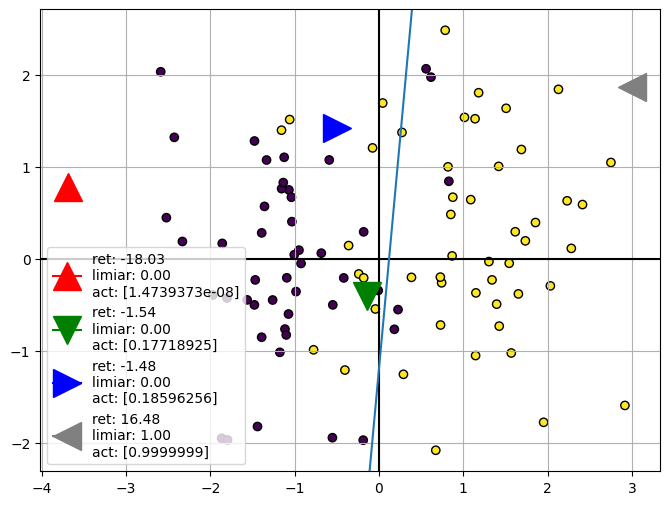

In [51]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8,6))
plotline_model(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
    x = torch.Tensor(X[idx])

    ret = perceptron(x)
    act = sigmoide(ret)

    act_limiar = 0 if ret.data < 0 else 1

    label = f'ret: {ret.data.numpy()[0]:5.2f}\nlimiar: {act_limiar:4.2f}\nact: {act.data.numpy()}'
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=20, label=label)

plt.legend()
plt.show()

# Redes Neurais

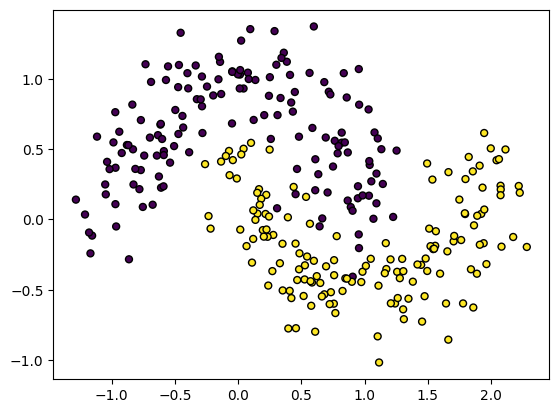

In [52]:
from sklearn.datasets import make_moons

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
 c=Y1, s=25, edgecolor='k')

## nn.Sequential

In [53]:
input_size = 2
hidden_size = 10
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # escondida
                    nn.ReLU(),   # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # saida
net.to(device)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [54]:
summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]              30
              ReLU-2                [-1, 1, 10]               0
            Linear-3                 [-1, 1, 1]              11
Total params: 41
Trainable params: 41
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Forward

In [55]:
print(X1.shape)
tensor = torch.from_numpy(X1).float().to(device)
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


## nn.Module

In [60]:
class RedeHenrique(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(RedeHenrique, self).__init__()

        # Arquitetura
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, X):
        # Saída do X
        hidden = self.relu(self.hidden(X))
        output = self.output(hidden)

        return output

In [63]:
input_size = 2
hidden_size = 10
output_size = 1

net_module = RedeHenrique(input_size, hidden_size, output_size).to(device)
print(net_module)

RedeHenrique(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [64]:
print(X1.shape)
tensor_module = torch.from_numpy(X1).float().to(device)
pred = net_module(tensor_module)
print(pred.size())

(300, 2)
torch.Size([300, 1])
